
# Regressions with Pytorch

With this lab exercise we will se how to perform regressions with Pytorch, exploring two different type of problems: 
- How to adjust a linear model of a bunch of data points.
- How to model a classifier for a set of features that describes wether a patient has breast cancer.

Author: [[Luis Salgueiro](https://imatge.upc.edu/web/people/luis-fernando-salgueiro)]

In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

## We will use scikit-learn! a must-know library for machine learning.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Linear Regression

![link text](https://res.cloudinary.com/practicaldev/image/fetch/s--KMgSmwnS--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/i/ukyl4xqvlpdg65l3tqn4.gif)

Shape of data: [(2000, 1), (2000,)]


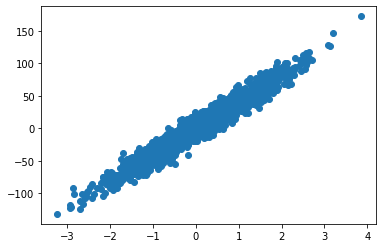

In [2]:
# Let's create a toy dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

X, y = datasets.make_regression(n_samples=2000, n_features=1, n_targets=1, noise=10, random_state=42, )

print(f'Shape of data: [{X.shape}, {y.shape}]')

#  A scatter plot can ilustrate how it is the distribution of data.
# Todo 1

plt.scatter(X, y)

# A linear model have two variables that need to be tunned.

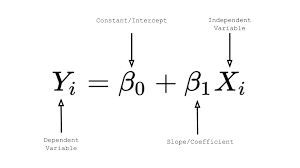

# We can create a linear model using pytorch

In [3]:
## In this ocasion, we can create a perceptron with 1 input and 1 output
##  Y= WX + B  

model = nn.Linear(1, 1)
print(model.weight)
print(model.bias)

# What can you notice with the prints?
# Values look to be randomized from -1:1, updating after each print

Parameter containing:
tensor([[-0.7662]], requires_grad=True)
Parameter containing:
tensor([0.9578], requires_grad=True)


In [4]:
# What is the values of the gradients and the gradient_function associated of each variable?
# ToDo ...
print(f' Gradient value for the W:{ model.weight.grad }  and the bias { model.bias.grad }')
print(f' Gradient value for the W:{ model.weight.grad_fn }  and the bias { model.bias.grad_fn }')

# Are this values correct?

 Gradient value for the W:None  and the bias None
 Gradient value for the W:None  and the bias None


When a model is created using torch.nn, the parameters that will be tunned, already have the `requires_grad=True` 

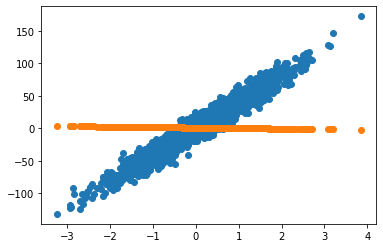

In [5]:
## Can you plot the raw  model?
# ToDo
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

y_pred = model(X)


plt.scatter(X,y)
plt.scatter(X,y_pred.squeeze().detach().numpy())

In [6]:
print(y_pred.grad)

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


# Lets Adjust the model




In [7]:
# ToDo  
learning_rate = 0.001 #... Choose a proper value
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch: 199, loss: 861.340
Epoch: 399, loss: 446.517


Text(0.5, 1.0, 'Learning curve')

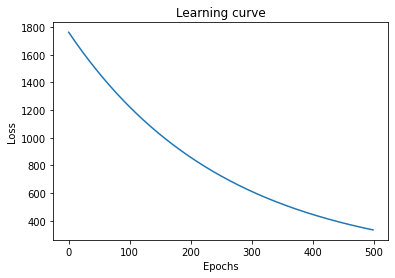

In [8]:
# ToDo
num_epochs = 500 # ... Choose a proper value  

epoch_loss = []
for epoch in range(num_epochs):
  # zero gradients
  optimizer.zero_grad()

  y_pred = model(X)

  loss = criterion(y_pred.squeeze(), y)

  # Backward pass
  loss.backward()
  
  epoch_loss.append(loss.item())

  #optimizer step 
  optimizer.step()

  if (epoch+1)%200 ==0:
    print(f'Epoch: {epoch}, loss: {loss.item():.3f}')


plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning curve')



# Lets plot the adjusted model now

Model with y = 25.00X + 0.97


Text(1, 1, 'y = 25.00X + 0.97')

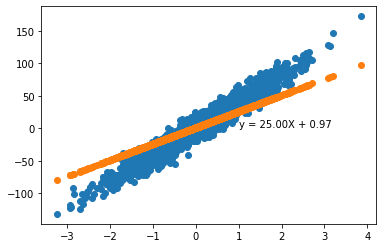

In [9]:
y_pred = model(X)
print(f'Model with y = {model.weight.item():.2f}X + {model.bias.item():.2f}')
# ToDo
plt.scatter(X, y)
plt.scatter(X, y_pred.detach().squeeze())
plt.text(1,1,s=f'y = {model.weight.item():.2f}X + {model.bias.item():.2f}')

# Logistic Regression

![link text](http://helloacm.com/wp-content/uploads/2016/03/logistic-regression-example.jpg)

In [10]:
# Binary classification
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', color_codes=True)
from sklearn.manifold import TSNE

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
df = datasets.load_breast_cancer()

## Now we have a lots of data related. A bunch of data
# https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3
print(df.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(df) # To have a little perspective of the dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [12]:
## With this ways is a little difficult to provide insights about the data
print(df['target'].shape)
print(df['target'][:4])
print(df['target_names'])
print(df['DESCR'])

(569,)
[0 0 0 0]
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features. 

In [13]:
# Organizing the data in a tabular form (The features) by using a dataframe with pandas
df2 = pd.DataFrame(df.data, columns=df.feature_names)
print(df2.head())
print(f'Len of the data (samples): {len(df2)}')

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
Len of the data (samples): 569


In [14]:
# lets expand our dataframe with the targets
df2['target'] = df.target

In [15]:
## Another way to see an info about the data
## The dataset have 30 features (0 to 29) and the last column will be our target
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
?## Organizing the dataset with input features  and targets from the dataframe.
X = df2.iloc[:,:-1]   
print(X.shape)       
y= df2.target         
print(y.shape)

Object `` not found.
(569, 30)
(569,)


In [17]:
# What is the distribution of the targets  ?
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [56]:
# lets split the dataset in train-test sub-sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(455, 30)
(114, 30)


In [57]:
n_samples, n_features= X_train.shape
print(n_samples)
print(n_features)

455
30


[169.   0.   0.   0.   0.   0.   0.   0.   0. 286.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[43.  0.  0.  0.  0.  0.  0.  0.  0. 71.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


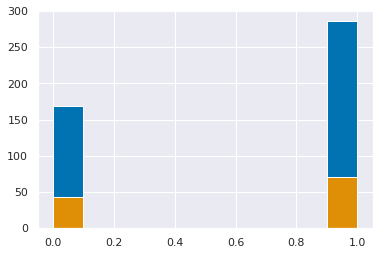

In [58]:
## With a plot we can see the distribution of targets of both subsets

n_samples_per_class, list_classes, _   = plt.hist(y_train)
print(n_samples_per_class)
print(list_classes)

n_samples_per_class, list_classes, _   = plt.hist(y_test)
print(n_samples_per_class)
print(list_classes)

In [59]:
# Now lets explore a little about the input X
print(X_train.iloc[:3,:])
print(X_train.mean())

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
68         9.029         17.33  ...          0.4228                   0.1175
181       21.090         26.57  ...          0.4098                   0.1284
63         9.173         13.86  ...          0.3282                   0.0849

[3 rows x 30 columns]
mean radius                 14.117635
mean texture                19.185033
mean perimeter              91.882242
mean area                  654.377582
mean smoothness              0.095744
mean compactness             0.103619
mean concavity               0.088898
mean concave points          0.048280
mean symmetry                0.181099
mean fractal dimension       0.062757
radius error                 0.402016
texture error                1.202687
perimeter error              2.858253
area error                  40.071299
smoothness error             0.006989
compactness error            0.025635
concavity error              0.032824
concave points error   

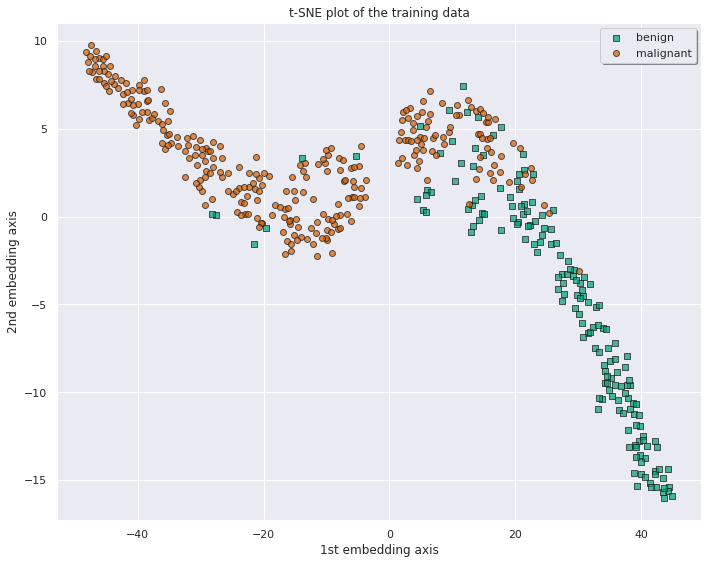

In [60]:
tsne = TSNE(n_components=2, random_state=0) 
# more abut TSNE https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))
mask_benign = (y_train == 0)    # == 'benign')
mask_malignant = (y_train ==1)  ##== 'malignant')

plt.scatter(X_train_tsne[mask_benign, 0], X_train_tsne[mask_benign, 1],
           marker='s', c='g', label='benign', edgecolor='k', alpha=0.7)
plt.scatter(X_train_tsne[mask_malignant, 0], X_train_tsne[mask_malignant, 1],
           marker='o', c='r', label='malignant', edgecolor='k', alpha=0.7)


plt.title('t-SNE plot of the training data')
plt.xlabel('1st embedding axis')
plt.ylabel('2nd embedding axis')
plt.legend(loc='best', frameon=True, shadow=True)

plt.tight_layout()
plt.show()
plt.close()

# We have seen some exploratory analysis about the dataset.
It is always a good practice to know the nature of the data we are dealing with. Like see the number of features, the range of data, if its necessary to perform some pre-processing, etc.

In [61]:
## As wee have seen, the features have different data ranges that need to be transformed
## scikit-learn provides a good method for scale the data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test)


In [62]:
# After scaling, each feature has mean=0, std=1
print(X_train2.mean(axis=0))
print(X_train2.std(axis=0))
print(X_test2.mean(axis=0))
print(X_test2.std(axis=0))


[-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15  1.00334881e-15  9.78216287e-16  5.78047988e-16
 -5.91846474e-15 -3.34799343e-15  8.53529701e-16 -7.47387500e-16
  7.52023596e-16  1.56163239e-17 -1.45012207e-15 -2.40149780e-15
  2.34732868e-16  3.27942801e-16 -3.14058913e-15  5.05090475e-16
  1.38741277e-15 -8.83298318e-17 -8.64509929e-16 -2.01596981e-15
  1.19318475e-15 -5.90492246e-16 -5.97568393e-16  1.08338247e-16
  4.78859931e-16 -2.32854029e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-5.31738396e-16  1.14917822e-15 -8.58962024e-16 -6.19387582e-16
 -1.58693721e-15  1.17839461e-16  4.47984729e-17 -3.27223628e-16
 -2.29105234e-16  1.64488306e-15 -2.25940124e-16 -7.66443439e-16
  1.90880450e-16  2.72686357e-16  9.43689571e-16 -4.86939923e-16
 -3.64231062e-16  2.66356138e-16  5.53163753e-16  7.27488245e-16
  5.21999598e-16  1.43744665e-15 -7.12880047e-16 -3.89551938e-17
 -6.03562035e-16 -1.74385360

# Lets converted to Tensors and work with Pytorch!

In [63]:
# ToDo
## Use the default datatype for pytorch
X_train = torch.from_numpy(X_train2.astype(np.float32))
X_test = torch.from_numpy(X_test2.astype(np.float32))
y_train = torch.from_numpy(y_train.to_numpy().astype(np.float32))  ## Converted a pandas series to numpy array first and then to tensor.
y_test = torch.from_numpy(y_test.to_numpy().astype(np.float32))

In [64]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, n_features):
    super(LogisticRegressionModel, self).__init__()  ## inhereted all the methods for initializing the model
    #ToDo 
    # Set the output value
    self.linear = nn.Linear(n_features, 2 )

  def forward(self, x):
    ## Check how we set the 'architecture' of the model.
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [65]:
model = LogisticRegressionModel(n_features=n_features)
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=30, out_features=2, bias=True)
)


In [66]:
model2 = nn.Sequential( nn.Linear(n_features,1) )
print(model2)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
)


# Define the loss and optimizer for training

In [67]:
learning_rate = 0.01
criterion = nn.BCELoss()

##ToDo
# Set the proper values for the optimizer. 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Training loop

In [80]:
## choose the proper value for training.
num_epochs= 1000
epoch_loss = []

# ToDo

for epoch in range(num_epochs):
  
  # zero gradients
  optimizer.zero_grad()
  
  #y_pred = model(X_train)

  y_pred = torch.sigmoid( model ( X_train ))[:,0]
  loss = criterion(y_pred.squeeze(), y_train)  ## What is the .squeeze doing here?

  # Backward pass
  loss.backward()
  epoch_loss.append(loss.item())

  #optimizer step 
  optimizer.step()

  if (epoch+1)%10 ==0:
    print(f'Epoch: {epoch}, loss: {loss.item():.3f}')


Epoch: 9, loss: 0.494
Epoch: 19, loss: 0.494
Epoch: 29, loss: 0.494
Epoch: 39, loss: 0.493
Epoch: 49, loss: 0.493
Epoch: 59, loss: 0.493
Epoch: 69, loss: 0.493
Epoch: 79, loss: 0.493
Epoch: 89, loss: 0.493
Epoch: 99, loss: 0.493
Epoch: 109, loss: 0.493
Epoch: 119, loss: 0.493
Epoch: 129, loss: 0.493
Epoch: 139, loss: 0.493
Epoch: 149, loss: 0.493
Epoch: 159, loss: 0.493
Epoch: 169, loss: 0.493
Epoch: 179, loss: 0.492
Epoch: 189, loss: 0.492
Epoch: 199, loss: 0.492
Epoch: 209, loss: 0.492
Epoch: 219, loss: 0.492
Epoch: 229, loss: 0.492
Epoch: 239, loss: 0.492
Epoch: 249, loss: 0.492
Epoch: 259, loss: 0.492
Epoch: 269, loss: 0.492
Epoch: 279, loss: 0.492
Epoch: 289, loss: 0.492
Epoch: 299, loss: 0.492
Epoch: 309, loss: 0.492
Epoch: 319, loss: 0.492
Epoch: 329, loss: 0.492
Epoch: 339, loss: 0.492
Epoch: 349, loss: 0.491
Epoch: 359, loss: 0.491
Epoch: 369, loss: 0.491
Epoch: 379, loss: 0.491
Epoch: 389, loss: 0.491
Epoch: 399, loss: 0.491
Epoch: 409, loss: 0.491
Epoch: 419, loss: 0.491
Epo

Text(0, 0.5, 'Loss')

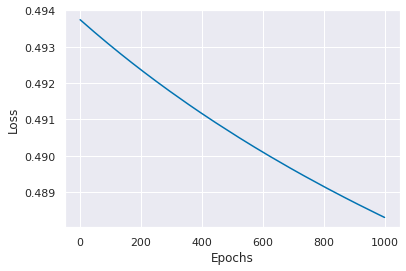

In [81]:
plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [86]:
# Lets calculate the performance of the model

with torch.no_grad():
  #ToDo
  y_pred = torch.sigmoid( model ( X_test ))[:,0]
  y_pred.squeeze_()
  y_pred_class = y_pred.round()

  acc = y_pred_class.eq(y_test).sum() / float(y_test.shape[0])
  print(f'Total ACCURACY: {acc}')


Total ACCURACY: 0.6228070259094238


In [ ]:
# ToDO  Repeat the training loop but now defining other model with nn.Sequential()

# References:
- https://logitboost.readthedocs.io/examples/Breast_Cancer.html
- https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3
- https://blog.goodaudience.com/awesome-introduction-to-logistic-regression-in-pytorch-d13883ceaa90
- https://www.youtube.com/watch?v=OGpQxIkR4ao
- https://www.youtube.com/watch?v=YAJ5XBwlN4o
